In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns # Vẽ heatmap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # chia tập train và test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('world_population.csv')
df = pd.DataFrame(data)
df.head(9)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57


In [3]:
# df.info()
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

ve bieu do dan so 

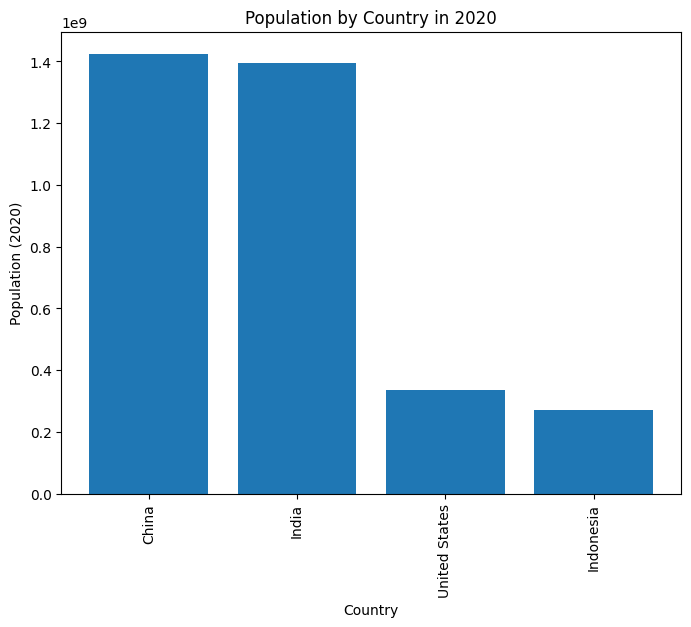

In [5]:
data = df.sort_values(by='Rank')
# sorted_data.head(10)
plt.figure(figsize=(8, 6))
plt.bar(data['Country/Territory'][0:4], data['2020 Population'][0:4])
plt.xlabel('Country')
plt.ylabel('Population (2020)')
plt.title('Population by Country in 2020')
plt.xticks(rotation=90)
plt.show()


In [6]:
data.tail(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
142,225,NRU,Nauru,Yaren,Oceania,12668,12315,11185,10241,10377,9598,7635,6663,21,603.2381,1.0125,0.0
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.0
216,227,TUV,Tuvalu,Funafuti,Oceania,11312,11069,10877,10550,9638,9182,7731,5814,26,435.0769,1.0096,0.0
173,228,BLM,Saint Barthelemy,Gustavia,North America,10967,10681,9643,8988,7082,5168,2983,2417,21,522.2381,1.0098,0.0
177,229,SPM,Saint Pierre and Miquelon,Saint-Pierre,North America,5862,5906,5978,6052,6274,6324,6106,5537,242,24.2231,0.9964,0.0
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.0
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.0
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.0
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.0
226,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.0


train


In [7]:
X = data[['Growth Rate', 'Area (km²)', 'Density (per km²)', 'World Population Percentage']]
y = data['2020 Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [8]:
r2 = r2_score(y_test, y_pred)
print(f"{'R-squared': <25}: {r2: .4f}")

R-squared                :  0.9993


In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f"{'Mean Squared Error': <25}: {mse: .4f}")

Mean Squared Error       :  1553124094541.8472


ve

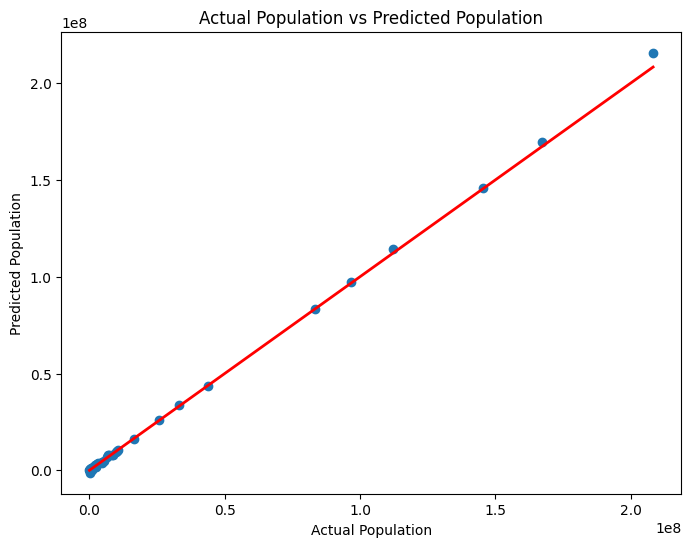

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of best fit
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual Population vs Predicted Population')
plt.show()

Text(0.5, 1.0, 'Population by Density')

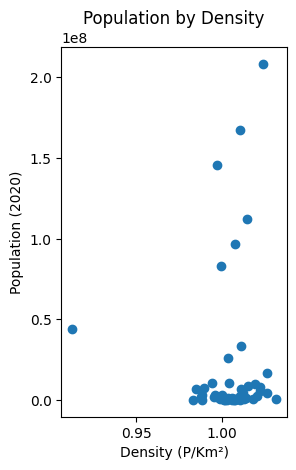

In [11]:
plt.subplot(1, 2, 1)
plt.scatter(X_test['Growth Rate'], y_test)
plt.xlabel('Density (P/Km²)')
plt.ylabel('Population (2020)')
plt.title('Population by Density')

Text(0.5, 1.0, 'Population by Density')

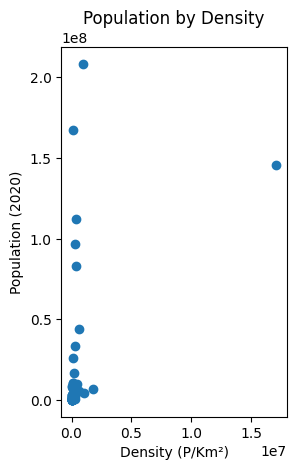

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_test['Area (km²)'], y_test)
plt.xlabel('Density (P/Km²)')
plt.ylabel('Population (2020)')
plt.title('Population by Density')

test

In [13]:
test = pd.DataFrame({
    'Growth Rate': [data['Growth Rate'].iloc[6]],
    'Area (km²)': [data['Area (km²)'].iloc[6]],
    'Density (per km²)': [data['Density (per km²)'].iloc[6]],
    'World Population Percentage': [data['World Population Percentage'].iloc[6]]
})
print(data['Country/Territory'].iloc[6])
predicted_population = model.predict(test)
predicted_population = np.float32(predicted_population[0])
print(predicted_population)

Brazil
214612660.0


In [14]:
data

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00
